In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses,Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1]**2))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1]**2))

In [4]:
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [5]:
loss_dict = {"adam":0.0,"rmsprop":0.0,"adadelta":0.0,"adagrad":0.0,"nadam":0.0,"sgd":0.0}
def train_model(input_layer,output_layer,optimizer,epochs,batch_size):
    autoencoder = Model(input_image,decoded)
    autoencoder.compile(optimizer=optimizer,loss = "binary_crossentropy",metrics = ["mean_squared_error"])
#     print(autoencoder.summary())
    print("With", optimizer,"optimizer")
    hist = autoencoder.fit(x_train,x_train,epochs = epochs,batch_size = batch_size,validation_data = (x_test,x_test))
    loss_dict[optimizer] = hist.history["val_loss"][-1]
    decoded_images = autoencoder.predict(x_test)
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(1, n + 1):
        # Display original
        ax = plt.subplot(2, n, i)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # Display reconstruction
        ax = plt.subplot(2, n, i + n)
        plt.imshow(decoded_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [6]:
input_image = Input(shape=(784,))
encoded = Dense(784,activation = "relu")(input_image)
encoded = Dense(392,activation = "relu")(encoded)
encoded = Dense(196,activation = "relu")(encoded)
encoded = Dense(128,activation = "relu")(encoded)
decoded = Dense(196,activation = "relu")(encoded)
decoded = Dense(392,activation = "relu")(decoded)
decoded = Dense(784,activation = "sigmoid")(decoded)

2022-03-04 08:55:25.904387: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-04 08:55:25.981524: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-04 08:55:25.982237: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-04 08:55:25.983918: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

With adam optimizer


2022-03-04 08:55:28.729179: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1246 - mean_squared_error: 0.0207 - val_loss: 0.0943 - val_mean_squared_error: 0.0107
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0913 - mean_squared_error: 0.0097 - val_loss: 0.0869 - val_mean_squared_error: 0.0084
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0861 - mean_squared_error: 0.0081 - val_loss: 0.0838 - val_mean_squared_error: 0.0074
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0832 - mean_squared_error: 0.0072 - val_loss: 0.0824 - val_mean_squared_error: 0.0070
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0814 - mean_squared_error: 0.0066 - val_loss: 0.0811 - val_mean_squared_error: 0.0066
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0801 - mean_squared_error: 0.0062 - val_loss: 0.0799 - val_mean_squared_error: 0.0062
Epoch 7/10
1875/

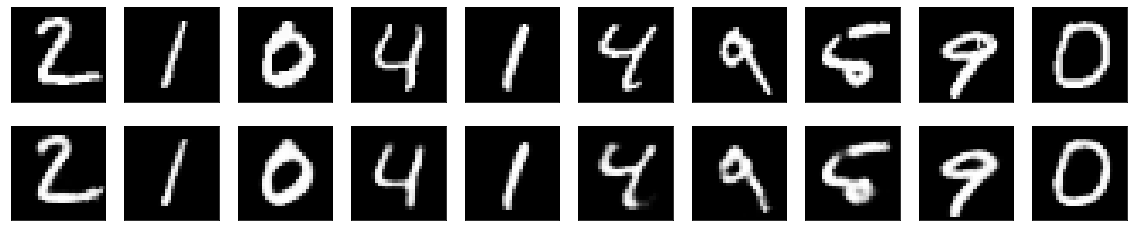

With rmsprop optimizer
Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0941 - mean_squared_error: 0.0105 - val_loss: 0.0922 - val_mean_squared_error: 0.0101
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0907 - mean_squared_error: 0.0095 - val_loss: 0.0886 - val_mean_squared_error: 0.0089
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0894 - mean_squared_error: 0.0091 - val_loss: 0.0873 - val_mean_squared_error: 0.0085
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0885 - mean_squared_error: 0.0088 - val_loss: 0.0876 - val_mean_squared_error: 0.0086
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0878 - mean_squared_error: 0.0086 - val_loss: 0.0853 - val_mean_squared_error: 0.0079
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0872 - mean_squared_error: 0.0084 - val_loss: 0.0870 - val_mean_squared_error: 

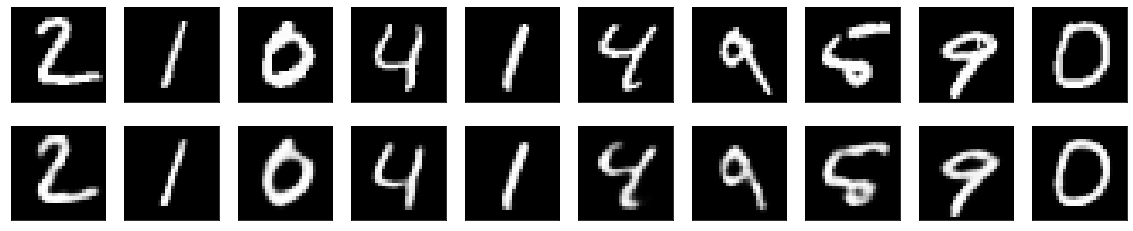

With adadelta optimizer
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0815 - mean_squared_error: 0.0066 - val_loss: 0.0812 - val_mean_squared_error: 0.0066
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0795 - mean_squared_error: 0.0060 - val_loss: 0.0807 - val_mean_squared_error: 0.0064
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0791 - mean_squared_error: 0.0059 - val_loss: 0.0805 - val_mean_squared_error: 0.0063
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0789 - mean_squared_error: 0.0058 - val_loss: 0.0803 - val_mean_squared_error: 0.0063
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0788 - mean_squared_error: 0.0057 - val_loss: 0.0802 - val_mean_squared_error: 0.0062
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0787 - mean_squared_error: 0.0057 - val_loss: 0.0801 - val_mean_squared_error:

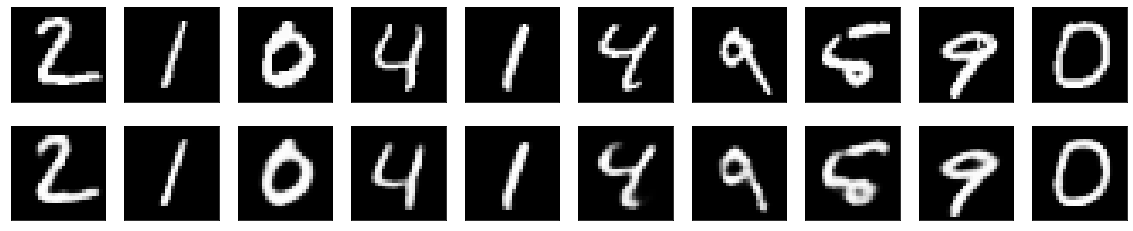

With adagrad optimizer
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0781 - mean_squared_error: 0.0055 - val_loss: 0.0795 - val_mean_squared_error: 0.0060
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0779 - mean_squared_error: 0.0055 - val_loss: 0.0794 - val_mean_squared_error: 0.0060
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0778 - mean_squared_error: 0.0055 - val_loss: 0.0793 - val_mean_squared_error: 0.0060
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0777 - mean_squared_error: 0.0054 - val_loss: 0.0792 - val_mean_squared_error: 0.0059
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0776 - mean_squared_error: 0.0054 - val_loss: 0.0791 - val_mean_squared_error: 0.0059
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0775 - mean_squared_error: 0.0054 - val_loss: 0.0790 - val_mean_squared_error: 

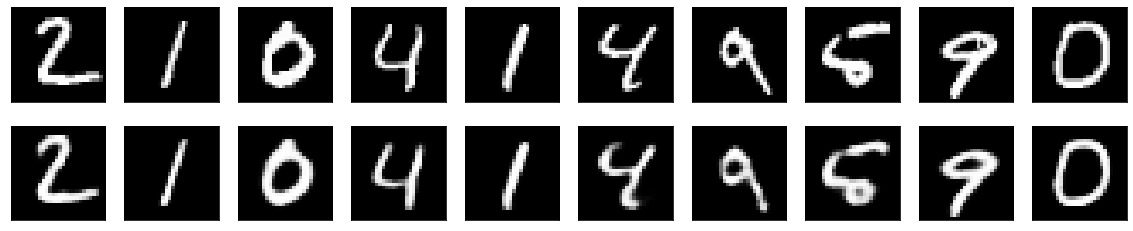

With nadam optimizer
Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0804 - mean_squared_error: 0.0063 - val_loss: 0.0801 - val_mean_squared_error: 0.0063
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0783 - mean_squared_error: 0.0056 - val_loss: 0.0779 - val_mean_squared_error: 0.0055
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0769 - mean_squared_error: 0.0052 - val_loss: 0.0767 - val_mean_squared_error: 0.0052
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0759 - mean_squared_error: 0.0049 - val_loss: 0.0758 - val_mean_squared_error: 0.0049
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0752 - mean_squared_error: 0.0047 - val_loss: 0.0759 - val_mean_squared_error: 0.0049
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0746 - mean_squared_error: 0.0045 - val_loss: 0.0754 - val_mean_squared_error: 0

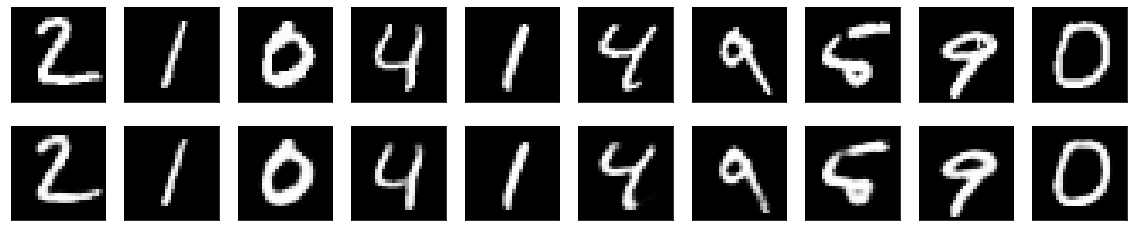

With sgd optimizer
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0714 - mean_squared_error: 0.0035 - val_loss: 0.0721 - val_mean_squared_error: 0.0038
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0710 - mean_squared_error: 0.0034 - val_loss: 0.0719 - val_mean_squared_error: 0.0037
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0708 - mean_squared_error: 0.0033 - val_loss: 0.0718 - val_mean_squared_error: 0.0037
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0708 - mean_squared_error: 0.0033 - val_loss: 0.0717 - val_mean_squared_error: 0.0037
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0707 - mean_squared_error: 0.0033 - val_loss: 0.0717 - val_mean_squared_error: 0.0037
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0706 - mean_squared_error: 0.0033 - val_loss: 0.0716 - val_mean_squared_error: 0.00

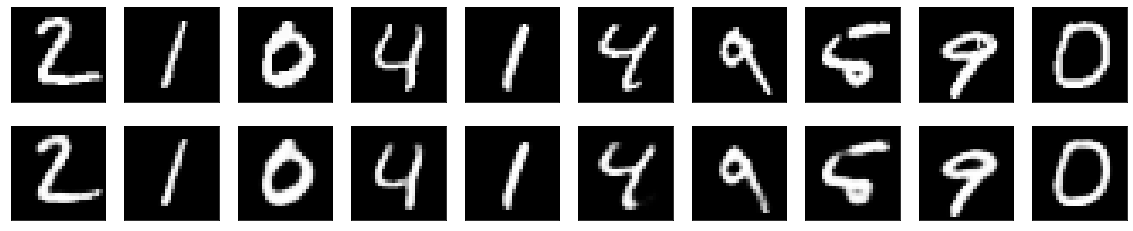

In [7]:
for i in ["adam","rmsprop","adadelta","adagrad","nadam","sgd"]:
    train_model(input_image,decoded,i,10,32)

In [11]:
loss_dict

{'adam': 0.07696831226348877,
 'rmsprop': 0.08692373335361481,
 'adadelta': 0.07972007244825363,
 'adagrad': 0.0787694975733757,
 'nadam': 0.073677659034729,
 'sgd': 0.07153443992137909}